# Nutritional values summary

This notebook computes and visualizes the nutritional composition of selected amounts of MuesliMaker ingredients. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("husl")
import numpy as np
import pandas as pd

The dictionary of nutritional values (nv) for the 20 selected ingredients is arranged in the following manner:

{ingredient : [list of nutritional values per 100g], ...}
  
  
The list itself is encoded as follows:

- 0: kcal
- 1: fat
- 2: saturated fat
- 3: carbs
- 4: fiber
- 5: sugar
- 6: protein

Values according to https://www.nutritionvalue.org/

In [18]:
# categories
categories = {'cereals':['Oats', 'Cornflakes', 'Crunchy'],
              'nuts':['Peanuts', 'Almonds', 'Walnuts', 'Macadamia', 'Pecan nuts', 'Cashews'],
              'seeds':['Chia seeds', 'Sunflower seeds', 'Pumpkin seeds'],
              'toppings':['Raisins' ,'Coconut flakes', 'Cocoa beans'],
              'powders':['Protein powder', 'Cacao'],
              'spices':['Cinnamon', 'Vanilla']}

# nutritional values
nv = {'Oats':[389, 6.9, 1.2, 66, 11, 0, 17], 
      'Cornflakes':[367, 0.4, 0.1, 84, 1.2, 9.3, 7.5], 
      'Crunchy':[482, 22, 11.1, 60, 5.8, 19.1, 8], 
      'Peanuts': [567, 49, 6.3, 16, 8.5, 4.7, 26], 
      'Almonds': [579, 50, 3.8, 22, 13, 4.4, 21], 
      'Walnuts': [654, 65, 6.1, 14, 6.7, 2.6, 15], 
      'Macadamia':[718, 76, 12, 14, 8.6, 4.6, 7.9], 
      'Pecan nuts':[691, 72, 6.2, 14, 9.6, 4, 9.2], 
      'Cashews':[553, 44, 7.8, 30, 3.3, 5.9, 18], 
      'Chia seeds':[486, 31, 3.3, 42, 34, 0, 17], 
      'Sunflower seeds':[582, 50, 5.2, 24, 11, 2.7, 19], 
      'Pumpkin seeds':[559, 49, 8.7, 11, 6, 1.4, 30], 
      'Raisins':[299, 0.5, 0.1, 79, 3.7, 59, 3.1], 
      'Coconut flakes':[671, 67, 57.5, 24, 16.8, 7.7, 7.2],
      'Cocoa beans':[600, 45.9, 28.2, 31.7, 31.7, 0, 14.1],
      'Protein powder':[359, 1.2, 0.6, 29, 0, 1.2, 58],
      'Cacao':[380, 3, 1, 80, 6, 77, 5], 
      'Cinnamon':[0, 0, 0, 0, 0, 0, 0], 
      'Vanilla':[0, 0, 0, 0, 0, 0, 0], 
      'Dry fruit':[247, 0, 0, 63.5, 7.1, 28.2, 3.5]}

In [7]:
def todict(a):
    if len(a) != len(nv):
        print('Cannot convert given list to dictionary.\n'+
             'Expected list of length', len(keys), 'but got a list of length', len(a), 'instead.')
    else:
        dictionary = dict(zip(nv.keys(), a))
    return(dictionary)

In [8]:
# the ingredients list contains the amount of ingredients in gram, acoording to customer selection
ingredients = [70, 0, 0, 10, 10, 5, 0, 20, 0, 5, 5, 0, 0, 0, 10, 0, 0, 1, 1, 10]
grams = todict(ingredients)

# a dictionary of only selected ingredients:
selected = dict((k, v) for k, v in grams.items() if v > 0)

Nutritional information about your meal:


{'Oats': 70,
 'Peanuts': 10,
 'Almonds': 10,
 'Walnuts': 5,
 'Pecan nuts': 20,
 'Chia seeds': 5,
 'Sunflower seeds': 5,
 'Cocoa beans': 10,
 'Cinnamon': 1,
 'Vanilla': 1,
 'Dry fruit': 10}

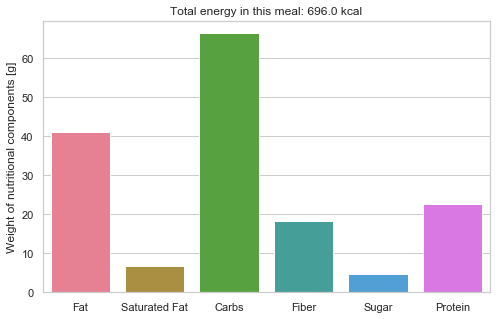

In [9]:
meal_comp = []
for ingredient in nv.keys():
    meal_comp.append(np.array(nv[ingredient])*grams[ingredient]/100)

meal = np.asarray(meal_comp).sum(axis=0)

# plot results
fig, ax = plt.subplots(figsize=(8,5))
index = ['Fat', 'Saturated Fat', 'Carbs', 'Fiber', 'Sugar', 'Protein']
ax = sns.barplot(index, meal[1:]);
ax.set(ylabel='Weight of nutritional components [g]', title=('Total energy in this meal: ' + str(round(meal[0])) + ' kcal'));

print('Nutritional information about your meal:')
selected

In [ ]:
print('\nCalories: ', round(meal[0]), 'kcal\nFat: ', round(meal[1]), 'g\nSaturated fat:', round(meal[2]), 
      'g\nCarbohydrates: ', round(meal[3]), 'g\nDietary Fiber: ', round(meal[4]), 'g\nSugar: ', round(meal[5]),
      'g\nProtein: ', round(meal[6]), 'g')

# Supply chain optimization

Simulates the amount of ingredients that the MuesliMaker has in stock at any given time.

First, a function is defined that will 'fill' the storage to maximum capacity.

In [12]:
# initialize stock first
current_stock = {'Oats':10.0, 
      'Cornflakes':10.0, 
      'Crunchy':10.0, 
      'Peanuts': 3.0, 
      'Almonds': 3.0, 
      'Walnuts': 2.0, 
      'Macadamia':2.0, 
      'Pecan nuts':2.0, 
      'Cashews':3.0, 
      'Chia seeds':2.0, 
      'Sunflower seeds':2.0, 
      'Pumpkin seeds':2.0, 
      'Raisins':4.0, 
      'Coconut flakes':2.0,
      'Cocoa beans':2.0,
      'Protein powder':2.0,
      'Cacao':2.0, 
      'Cinnamon':0.2, 
      'Vanilla':0.2, 
      'Dry fruit':3.0}

In [15]:
def fill():
    current_stock.update({'Oats':10.0, 
      'Cornflakes':10.0, 
      'Crunchy':10.0, 
      'Peanuts': 3.0, 
      'Almonds': 3.0, 
      'Walnuts': 2.0, 
      'Macadamia':2.0, 
      'Pecan nuts':2.0, 
      'Cashews':3.0, 
      'Chia seeds':2.0, 
      'Sunflower seeds':2.0, 
      'Pumpkin seeds':2.0, 
      'Raisins':4.0, 
      'Coconut flakes':2.0,
      'Cocoa beans':2.0,
      'Protein powder':2.0,
      'Cacao':2.0, 
      'Cinnamon':0.2, 
      'Vanilla':0.2, 
      'Dry fruit':3.0})
    print('Machine refilled. Current stock:')
    return current_stock

Next, an ``order`` function is defined that takes a list of ingredients in [g] as input and subtracts it from the current stock.  
It will output a warning if certain ingredients are running low and throw an error if the (amount of) ordered ingredient is currently not in stock.  

In addition, it will suggest an alternative according to (preferences and/or) ingredient similarity and which of the similar ingredients are most abundant in stock.

In [ ]:
get_alternative('Cornflakes')

In [44]:
def get_alternative(ingredient, ingredients):
    # order and current stock in [kg]:
    ing = np.asarray(ingredients)/1000
    cs = np.asarray(list(current_stock.values()))
    
    for cat in categories:
        if ingredient in categories[cat]:
            df = pd.DataFrame.from_dict(current_stock, orient='index')
            # suggest a different ingredient with most supplies in stock as alternative:
            # but only if the available alternatives have sufficient stock
            
            alternative = df.loc[categories[cat]].idxmax()[0]
    return alternative


def order(ingredients):
    # order and current stock in [kg]:
    ing = np.asarray(ingredients)/1000
    cs = np.asarray(list(current_stock.values()))
    
# check for order feasibility:
    
    # 1. portion too big
    if ing.sum() > 250:
        print('Yay, that\'s a big portion! ...Unfortunately it probably won\'t fit into your bowl.',
              '\nIf you\'re really that hungry: no problem! Feel free to order twice :)')
        
    # 2. at least one ingredient out of stock (oos)
    elif (ing > cs).sum() > 0:
        oos = ing > cs
        pos_oos = [i for i, x in enumerate(oos) if x]
        out_of_stock = []
        for j in pos_oos:
            out_of_stock.append(list(current_stock.keys())[j])
        print('We\'re sorry, at least one of your ordered ingredients is currently out of stock :(',
             '\nBut hey, that\'s the perfect opportunity to try something new!')
        for x in range(len(out_of_stock)):
            
            for cat in categories:
                if ingredient in categories[cat]:
                    df = pd.DataFrame.from_dict(current_stock, orient='index')
                    # suggest the ingredient with most supplies in stock as alternative:
                    alternative = df.loc[categories[cat]].idxmax()[0]
                    
            alternative = get_alternative(out_of_stock[x])
            print('\nHow about', alternative, 'instead of', out_of_stock[x], 'today?') 
            a = input('\nPress "y" if that sounds great to you! \nCancel the order by pressing any other key.\n')
            
    # 2.1 User accepts alternative suggestion -> Order can proceed normally        
            if a == 'y':
                # update ingredients
                
                print('Perfect, your order has been updated.')
                
                ingredients_kg = {k: v / 1000 for k, v in todict(ingredients).items()}
                #subtract order from storage
                current_stock.update({key: current_stock[key] - ingredients_kg.get(key, 0) for key in current_stock.keys()})

                # check for low supplies:
                critical = np.fromiter(current_stock.values(), dtype=float) < 0.2
                pos_low_supplies = [i for i, x in enumerate(critical) if x]
                low_supplies = []
                for j in pos_low_supplies:
                    low_supplies.append(list(current_stock.keys())[j])
                if critical.sum() > 0:
                    print('\nWARNING:')
                    for x in range(len(low_supplies)):
                        print('Less than 200g of', low_supplies[x], 'in stock!')

                print('\nOrder has been placed. Stock was updated:')
                return current_stock
                
    # 2.2 order is cancelled            
            else:
                print('We\'re sorry to hear that :(\nNew supplies are on the way.')
                # get other suggestions? Or cancel order... :(
        
    # Order can proceed normally:
    else:
        # convert to dictionary and [kg]
        ingredients_kg = {k: v / 1000 for k, v in todict(ingredients).items()}
        #subtract order from storage
        current_stock.update({key: current_stock[key] - ingredients_kg.get(key, 0) for key in current_stock.keys()})

        # check for low supplies:
        critical = np.fromiter(current_stock.values(), dtype=float) < 0.2
        pos_low_supplies = [i for i, x in enumerate(critical) if x]
        low_supplies = []
        for j in pos_low_supplies:
            low_supplies.append(list(current_stock.keys())[j])
        if critical.sum() > 0:
            print('\nWARNING:')
            for x in range(len(low_supplies)):
                print('Less than 200g of', low_supplies[x], 'in stock!')

        print('\nOrder has been placed. Stock was updated:')
        return current_stock

In [ ]:
ingredients = [0, 70, 0, 10, 10, 5, 0, 20, 0, 5, 5, 0, 0, 0, 10, 0, 0, 1, 220, 10]

order(ingredients)

We're sorry, at least one of your ordered ingredients is currently out of stock :( 
But hey, that's the perfect opportunity to try something new!

How about Cinnamon instead of Vanilla today?


In [50]:
fill()

Machine refilled. Current stock:


{'Oats': 10.0,
 'Cornflakes': 10.0,
 'Crunchy': 10.0,
 'Peanuts': 3.0,
 'Almonds': 3.0,
 'Walnuts': 2.0,
 'Macadamia': 2.0,
 'Pecan nuts': 2.0,
 'Cashews': 3.0,
 'Chia seeds': 2.0,
 'Sunflower seeds': 2.0,
 'Pumpkin seeds': 2.0,
 'Raisins': 4.0,
 'Coconut flakes': 2.0,
 'Cocoa beans': 2.0,
 'Protein powder': 2.0,
 'Cacao': 2.0,
 'Cinnamon': 0.2,
 'Vanilla': 0.2,
 'Dry fruit': 3.0}